In [1]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing contacts.csv
contacts = pd.read_csv('contacts.csv')
contacts.head(5)
contacts.info()
# we can see that out of 27,887 guest-host communications, 11,587 resulted in bookings. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27887 entries, 0 to 27886
Data columns (total 14 columns):
id_guest_anon                           27887 non-null object
id_host_anon                            27887 non-null object
id_listing_anon                         27887 non-null object
ts_interaction_first                    27887 non-null object
ts_reply_at_first                       25855 non-null object
ts_accepted_at_first                    16415 non-null object
ts_booking_at                           11587 non-null object
ds_checkin_first                        27887 non-null object
ds_checkout_first                       27887 non-null object
m_guests                                27886 non-null float64
m_interactions                          27887 non-null int64
m_first_message_length_in_characters    27887 non-null float64
contact_channel_first                   27887 non-null object
guest_user_stage_first                  27887 non-null object
dtypes: float64(2), in

In [3]:
contacts.describe(include='all')

# there are clearly some outliers in the no. of guests, m_interations and first message length.
# Contact_me is the most used form of inquiry
# Out of 27,887, 15,905 had inquiries from new users

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first
count,27887,27887,27887,27887,25855,16415,11587,27887,27887,27886.000000,27887.000000,27887.000000,27887,27887
unique,22566,8959,12819,27871,25834,16409,11584,422,443,NaN,NaN,NaN,3,3
top,25940fca-7aa9-480d-9cf0-56cc1136d30c,261917c5-0378-4a79-bce6-de34ce54034a,73f9cbd5-7557-4137-9a35-7fde4e2d7ee2,2016-06-13 14:10:24,2016-01-04 23:14:21.0,2016-02-22 13:02:10.0,2016-03-08 22:33:45.0,2016-02-05,2016-02-10,NaN,NaN,NaN,contact_me,new
freq,40,216,31,2,2,2,2,1227,1447,NaN,NaN,NaN,12828,15905
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.782041,8.255818,193.712626,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.863797,10.035784,183.172132,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,3.000000,66.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,5.000000,154.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,10.000000,269.000000,NaN,NaN


In [4]:
#importing listings.csv

listings = pd.read_csv('listings.csv')
listings.head()

,id_listing_anon,room_type,listing_neighborhood,total_reviews
0,71582793-e5f8-46d7-afdf-7a31d2341c79,Private room,-unknown-,0.0
1,a1a3f728-e21f-4432-96aa-361d28e2b319,Entire home/apt,Copacabana,0.0
2,353a68be-ecf9-4b7b-9533-c882dc2f0760,Entire home/apt,Barra da Tijuca,3.0
3,b9ae1908-0486-40ac-bbcf-bd63ffebfe63,Entire home/apt,Lapa,4.0
4,fa0290ef-7881-4482-8981-8ebb1ce5dbfd,Entire home/apt,-unknown-,0.0


In [5]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13038 entries, 0 to 13037
Data columns (total 4 columns):
id_listing_anon         13038 non-null object
room_type               13038 non-null object
listing_neighborhood    13038 non-null object
total_reviews           13038 non-null float64
dtypes: float64(1), object(3)
memory usage: 407.5+ KB


In [6]:
listings.describe(include='all')

#need to investigate the negative no. of reviews. Some listings are probably outliers
#majority of the listings are entire home/apts

,id_listing_anon,room_type,listing_neighborhood,total_reviews
count,13038,13038,13038,13038.000000
unique,13038,3,68,NaN
top,0e4a2004-f8a1-4175-bdcb-1781579b5536,Entire home/apt,-unknown-,NaN
freq,1,9647,6221,NaN
mean,NaN,NaN,NaN,7.004525
std,NaN,NaN,NaN,17.059747
min,NaN,NaN,NaN,-34.000000
25%,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,5.000000


In [7]:
#importing users.csv

users = pd.read_csv('users.csv')
users.head()

,id_user_anon,country,words_in_user_profile
0,1d16a001-31a2-494c-a101-1f7b308adc62,FR,0
1,42607e0a-86c0-472e-b633-9e192114e93c,AR,0
2,25f85eb5-a700-44e1-b142-4c076222198d,BR,0
3,55abeba0-18ef-4c58-80f4-3c278b706aca,BR,1
4,5d62d35a-7d6d-45dd-ae9b-a5d2f82a7d7b,BR,98


In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31525 entries, 0 to 31524
Data columns (total 3 columns):
id_user_anon             31525 non-null object
country                  31524 non-null object
words_in_user_profile    31525 non-null int64
dtypes: int64(1), object(2)
memory usage: 738.9+ KB


In [9]:
users.describe(include='all')

#There are some duplicate users in this table. Need to investigate
#There are outliers in the profiles with some profiles having lot of words

,id_user_anon,country,words_in_user_profile
count,31525,31524,31525.000000
unique,31457,121,NaN
top,d0df5d42-f977-4e73-8970-ac3013f3394a,BR,NaN
freq,2,19634,NaN
mean,NaN,NaN,16.222141
std,NaN,NaN,44.391491
min,NaN,NaN,0.000000
25%,NaN,NaN,0.000000
50%,NaN,NaN,0.000000
75%,NaN,NaN,12.000000


In [10]:
users[users['id_user_anon']=='71a68d20-ca65-44db-8122-e5c0b2a2435a']

,id_user_anon,country,words_in_user_profile
25994,71a68d20-ca65-44db-8122-e5c0b2a2435a,BR,24
31516,71a68d20-ca65-44db-8122-e5c0b2a2435a,BR,24


In [11]:
#removing duplicates 
users = users.drop_duplicates(subset = 'id_user_anon', keep='first')
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31457 entries, 0 to 31456
Data columns (total 3 columns):
id_user_anon             31457 non-null object
country                  31456 non-null object
words_in_user_profile    31457 non-null int64
dtypes: int64(1), object(2)
memory usage: 983.0+ KB


In [12]:
users.describe(include='all')

,id_user_anon,country,words_in_user_profile
count,31457,31456,31457.000000
unique,31457,121,NaN
top,d98fbee5-5e54-4b20-930e-4cc4ef5ebff2,BR,NaN
freq,1,19568,NaN
mean,NaN,NaN,16.144642
std,NaN,NaN,44.216915
min,NaN,NaN,0.000000
25%,NaN,NaN,0.000000
50%,NaN,NaN,0.000000
75%,NaN,NaN,12.000000


In [13]:
users[users['country'].isnull()]

# 1 user for which country data is missing

,id_user_anon,country,words_in_user_profile
18866,e0e03982-682e-4a58-a3f7-9f393e4875d6,NaN,0


In [14]:
# combining the 3 data frames into 1

data = pd.merge(contacts, listings, how='left', on=['id_listing_anon','id_listing_anon'])
data = pd.merge(data, users, how='left', left_on='id_guest_anon', right_on='id_user_anon',validate="many_to_one")
data.rename(columns={'country':'guest_country','words_in_user_profile':'words_in_guest_profile'},inplace=True)
data.drop(columns='id_user_anon',axis=1,inplace=True)
df = pd.merge(data, users, how='left', left_on='id_host_anon', right_on='id_user_anon',validate="many_to_one")
df.rename(columns={'country':'host_country','words_in_user_profile':'words_in_host_profile'},inplace=True)
df.drop(columns='id_user_anon',axis=1,inplace=True)

In [16]:
df[df['ts_reply_at_first']!=df['ts_accepted_at_first']]

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,...,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first,room_type,listing_neighborhood,total_reviews,guest_country,words_in_guest_profile,host_country,words_in_host_profile
1,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36.0,NaN,NaN,2016-08-11,2016-08-22,5.0,...,312.0,contact_me,past_booker,Entire home/apt,Copacabana,0.0,FR,0,BR,0
2,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47.0,NaN,NaN,2016-03-14,2016-03-23,1.0,...,164.0,contact_me,new,Private room,Vidigal,49.0,AR,0,BR,82
4,5ddbbcc3-ac1a-4d8a-b6f8-0f675b76d1b2,f2fed6f3-4c5c-453d-9e64-37c62b8bd06d,f2928a59-c5e7-42b2-9c37-240a40f38dc0,2016-06-23 03:09:25.0,2016-06-23 03:09:26.0,2016-06-23 03:09:33.0,2016-06-23 03:09:33.0,2016-08-19,2016-08-21,3.0,...,0.0,instant_book,past_booker,Entire home/apt,Ipanema,1.0,BR,1,BR,0
5,25940fca-7aa9-480d-9cf0-56cc1136d30c,90334ef3-f489-45a0-89e0-d18d370e4a1c,5dd24057-774c-45b3-b305-ebf664246952,2016-04-19 07:08:21,2016-04-19 11:32:23.0,NaN,NaN,2016-04-26,2016-05-01,1.0,...,348.0,contact_me,new,Entire home/apt,Copacabana,0.0,BR,0,BR,1
6,ee6633e1-96de-47f6-96e7-d962fc6db7dd,10dc3fc4-694f-44b2-aaac-9dbace0ebabd,259d4a6c-dcda-4ff2-85cb-2882f6801b3a,2016-05-30 15:16:21,2016-05-30 15:18:55.0,2016-06-01 23:38:20.0,NaN,2016-08-06,2016-08-14,6.0,...,29.0,contact_me,past_booker,Entire home/apt,Copacabana,0.0,AR,16,BR,87
9,177cddfa-fe47-4668-81bf-884490a6707b,2bd81140-3d71-4fd9-add3-5998f9263c57,cff02e60-1205-42fa-afd4-0c23029ce32e,2016-04-26 02:11:47,2016-04-26 02:16:39.0,NaN,NaN,2016-08-12,2016-08-17,4.0,...,128.0,book_it,new,Entire home/apt,-unknown-,3.0,US,50,BR,15
10,8cb51614-2851-4d3d-93a6-620556ace3de,7a7c50a7-2a19-44a7-ab5c-b2b658ebcf8b,472ead4a-63a3-422e-8c98-1745f773e2c0,2016-01-10 18:09:45,2016-01-11 15:19:22.0,NaN,NaN,2016-02-06,2016-02-09,4.0,...,128.0,contact_me,new,Entire home/apt,Leme,3.0,BR,0,BR,26
11,b88f0944-8278-49c1-928c-eac65ca3a8d2,bf6e95ec-966d-46af-9bfe-f2dd91523571,1f51882a-4abd-4bd4-be6d-a75ae8be4986,2016-06-03 22:40:22,2016-06-06 21:27:00.0,NaN,NaN,2016-08-14,2016-08-19,4.0,...,280.0,book_it,new,Entire home/apt,-unknown-,0.0,AR,1,BR,1
14,0e07d4e8-2c3c-4848-b9dc-f7a859309e80,e540b776-3f0f-498b-ad8a-a0ecc54df286,efbd8ae0-75e5-4d05-be3a-1c150ce3a9fd,2016-04-13 07:37:53,2016-04-14 23:07:54.0,NaN,NaN,2016-08-01,2016-08-16,3.0,...,165.0,book_it,new,Entire home/apt,Glória,12.0,ME,0,BR,32
15,255d7130-faea-4965-be56-96414335df6d,efa7ea8b-e78c-48d1-abfd-1dfc06c48e61,4c1011e5-da80-4c45-a5f9-a5ae9ff4e58f,2016-01-06 18:58:31,2016-01-06 19:20:34.0,2016-01-06 19:30:47.0,2016-01-06 19:30:47.0,2016-02-16,2016-05-16,1.0,...,395.0,book_it,past_booker,Entire home/apt,Gávea,9.0,GB,55,BR,938


In [17]:
df.describe(include='all')
#ideally the host_country should always be Brazil since the inquiries are related to bookings in Rio. Need to investigate this further
#Probably the owner of the property is from another country and not Brazil

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,...,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first,room_type,listing_neighborhood,total_reviews,guest_country,words_in_guest_profile,host_country,words_in_host_profile
count,27887,27887,27887,27887,25855,16415,11587,27887,27887,27886.000000,...,27887.000000,27887,27887,27887,27887,27887.000000,27886,27887.000000,27887,27887.000000
unique,22566,8959,12819,27871,25834,16409,11584,422,443,NaN,...,NaN,3,3,3,68,NaN,121,NaN,26,NaN
top,25940fca-7aa9-480d-9cf0-56cc1136d30c,261917c5-0378-4a79-bce6-de34ce54034a,73f9cbd5-7557-4137-9a35-7fde4e2d7ee2,2016-06-13 14:10:24,2016-01-04 23:14:21.0,2016-02-22 13:02:10.0,2016-03-08 22:33:45.0,2016-02-05,2016-02-10,NaN,...,NaN,contact_me,new,Entire home/apt,-unknown-,NaN,BR,NaN,BR,NaN
freq,40,216,31,2,2,2,2,1227,1447,NaN,...,NaN,12828,15905,20981,11828,NaN,13613,NaN,27572,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.782041,...,193.712626,NaN,NaN,NaN,NaN,15.665113,NaN,10.077491,NaN,53.915086
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.863797,...,183.172132,NaN,NaN,NaN,NaN,27.752117,NaN,30.475024,NaN,102.170298
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,NaN,NaN,NaN,NaN,-34.000000,NaN,0.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,...,66.000000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,...,154.000000,NaN,NaN,NaN,NaN,3.000000,NaN,0.000000,NaN,21.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,...,269.000000,NaN,NaN,NaN,NaN,18.000000,NaN,1.000000,NaN,63.000000


In [18]:
# Finding the no. of listings with negative no. of total reviews
df[df['total_reviews']<0].count()

id_guest_anon                           92
id_host_anon                            92
id_listing_anon                         92
ts_interaction_first                    92
ts_reply_at_first                       87
ts_accepted_at_first                    56
ts_booking_at                           33
ds_checkin_first                        92
ds_checkout_first                       92
m_guests                                92
m_interactions                          92
m_first_message_length_in_characters    92
contact_channel_first                   92
guest_user_stage_first                  92
room_type                               92
listing_neighborhood                    92
total_reviews                           92
guest_country                           92
words_in_guest_profile                  92
host_country                            92
words_in_host_profile                   92
dtype: int64

In [19]:
# converting all date and timestamps from string objects
df['ts_interaction_first'] = pd.to_datetime(df['ts_interaction_first'], format='%Y-%m-%d %H:%M:%S', utc=True)
df['ts_reply_at_first'] = pd.to_datetime(df['ts_reply_at_first'], format='%Y-%m-%d %H:%M:%S', utc=True)
df['ts_accepted_at_first'] = pd.to_datetime(df['ts_accepted_at_first'], format='%Y-%m-%d %H:%M:%S', utc=True)
df['ts_booking_at'] = pd.to_datetime(df['ts_booking_at'], format='%Y-%m-%d %H:%M:%S', utc=True)
df['ds_checkin_first'] = pd.to_datetime(df['ds_checkin_first'], format='%Y-%m-%d')
df['ds_checkout_first'] = pd.to_datetime(df['ds_checkout_first'], format='%Y-%m-%d')
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27887 entries, 0 to 27886
Data columns (total 21 columns):
id_guest_anon                           27887 non-null object
id_host_anon                            27887 non-null object
id_listing_anon                         27887 non-null object
ts_interaction_first                    27887 non-null datetime64[ns, UTC]
ts_reply_at_first                       25855 non-null datetime64[ns, UTC]
ts_accepted_at_first                    16415 non-null datetime64[ns, UTC]
ts_booking_at                           11587 non-null datetime64[ns, UTC]
ds_checkin_first                        27887 non-null datetime64[ns]
ds_checkout_first                       27887 non-null datetime64[ns]
m_guests                                27886 non-null float64
m_interactions                          27887 non-null int64
m_first_message_length_in_characters    27887 non-null float64
contact_channel_first                   27887 non-null object
guest_user_stage

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,...,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first,room_type,listing_neighborhood,total_reviews,guest_country,words_in_guest_profile,host_country,words_in_host_profile
0,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-04-21 02:55:53+00:00,2016-04-21 03:15:00+00:00,2016-04-21 03:15:00+00:00,2016-04-21 03:15:00+00:00,2016-08-02,2016-08-06,4.0,...,31.0,book_it,past_booker,Entire home/apt,Copacabana,9.0,CL,0,BR,59
1,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01+00:00,2016-02-16 23:37:36+00:00,NaT,NaT,2016-08-11,2016-08-22,5.0,...,312.0,contact_me,past_booker,Entire home/apt,Copacabana,0.0,FR,0,BR,0
2,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38+00:00,2016-01-28 02:12:47+00:00,NaT,NaT,2016-03-14,2016-03-23,1.0,...,164.0,contact_me,new,Private room,Vidigal,49.0,AR,0,BR,82
3,b0af8848-fe2a-4ef1-991e-26ab3066feb3,01614601-d5a4-4776-ab9b-c10d3b865bf0,855f6779-346c-45fc-a64b-ea133250ca7a,2016-05-05 14:42:52+00:00,2016-05-05 15:17:40+00:00,2016-05-05 15:17:40+00:00,NaT,2016-05-27,2016-05-29,2.0,...,203.0,contact_me,new,Entire home/apt,Copacabana,17.0,BR,0,BR,149
4,5ddbbcc3-ac1a-4d8a-b6f8-0f675b76d1b2,f2fed6f3-4c5c-453d-9e64-37c62b8bd06d,f2928a59-c5e7-42b2-9c37-240a40f38dc0,2016-06-23 03:09:25+00:00,2016-06-23 03:09:26+00:00,2016-06-23 03:09:33+00:00,2016-06-23 03:09:33+00:00,2016-08-19,2016-08-21,3.0,...,0.0,instant_book,past_booker,Entire home/apt,Ipanema,1.0,BR,1,BR,0


In [20]:
# creating a new column to identify if the booking was done or not. The condition checked is if a timestamp is 
# present for the booking

df['booking'] = np.where(df['ts_booking_at'].isnull(), 0, 1)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 27887 entries, 0 to 27886
Data columns (total 22 columns):
id_guest_anon                           27887 non-null object
id_host_anon                            27887 non-null object
id_listing_anon                         27887 non-null object
ts_interaction_first                    27887 non-null datetime64[ns, UTC]
ts_reply_at_first                       25855 non-null datetime64[ns, UTC]
ts_accepted_at_first                    16415 non-null datetime64[ns, UTC]
ts_booking_at                           11587 non-null datetime64[ns, UTC]
ds_checkin_first                        27887 non-null datetime64[ns]
ds_checkout_first                       27887 non-null datetime64[ns]
m_guests                                27886 non-null float64
m_interactions                          27887 non-null int64
m_first_message_length_in_characters    27887 non-null float64
contact_channel_first                   27887 non-null object
guest_user_stage

In [21]:
sns.set_style('whitegrid')

In [22]:
df['contact_channel_first'].unique()

array(['book_it', 'contact_me', 'instant_book'], dtype=object)

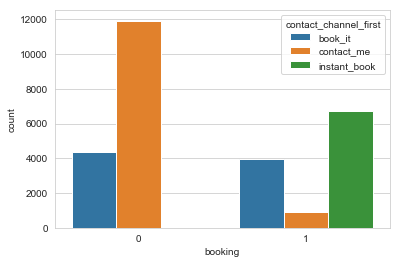

In [23]:
sns.countplot(data=df,x='booking',hue='contact_channel_first')

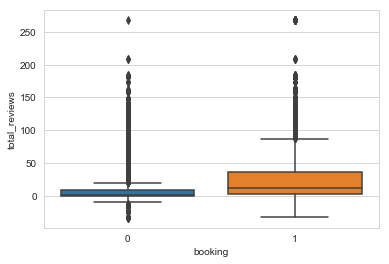

In [24]:
sns.boxplot(x='booking',y='total_reviews',data=df)

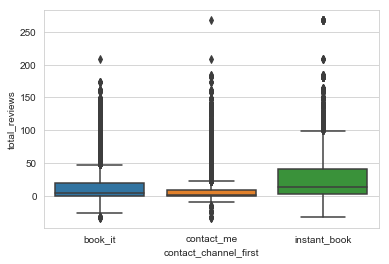

In [25]:
sns.boxplot(x='contact_channel_first',y='total_reviews',data=df)

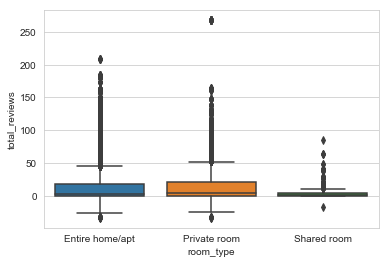

In [26]:
sns.boxplot(x='room_type',y='total_reviews',data=df)

In [27]:
x=df.groupby('contact_channel_first').agg({'booking':['count','sum']})
x

booking      
                        count   sum
contact_channel_first              
book_it                  8366  3983
contact_me              12828   911
instant_book             6693  6693

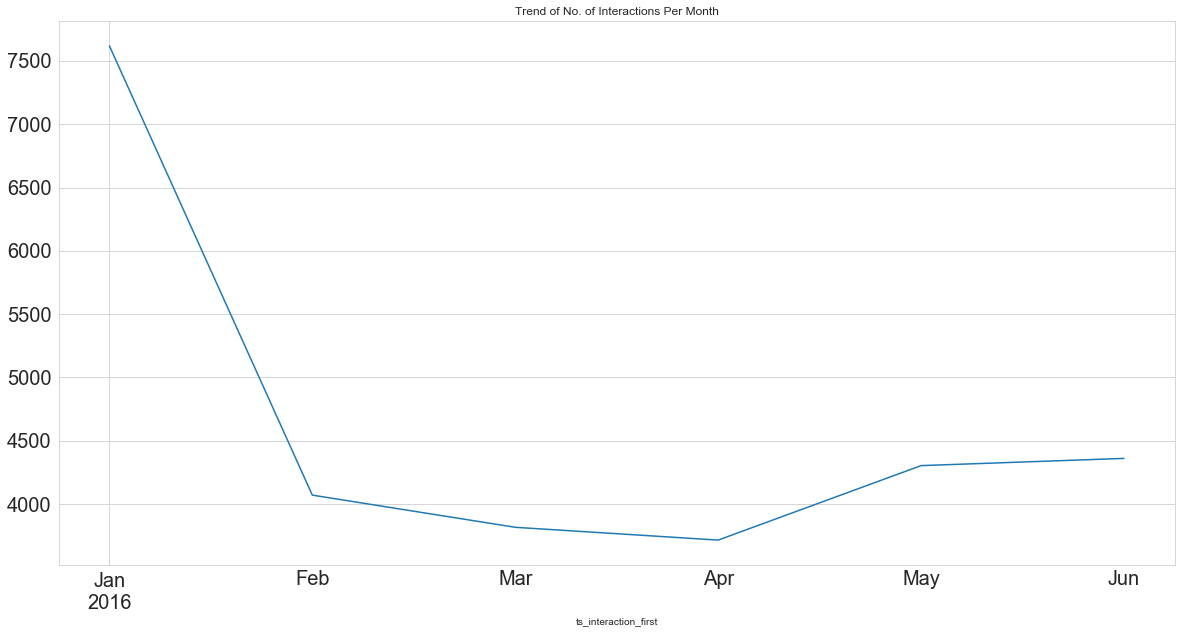

In [28]:
ax = df.groupby([pd.Grouper(key='ts_interaction_first', freq='M')])['booking'].count()
ax.plot(kind='line', figsize=(20,10), title = 'Trend of No. of Interactions Per Month', grid = None, fontsize=20)

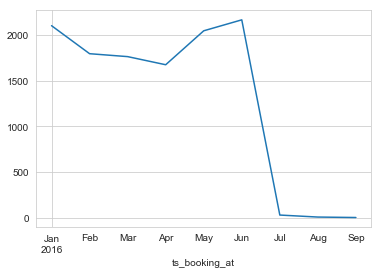

In [29]:
ay = df.groupby([pd.Grouper(key='ts_booking_at', freq='M')])['booking'].sum()
ay.plot()

# we see that most of the booking data is till June.This aligns with the fact that all of the interaction data is 
# till June. Some of those interactions result in bookings in July, August, September

In [30]:
# overall % of interactions -> bookings
df['booking'].sum()/df['booking'].count()

0.4154982608383835

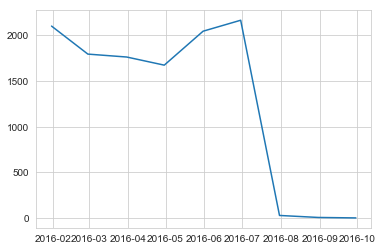

In [31]:
plt.plot(ay)

In [32]:
az=df.groupby([pd.Grouper(key='ts_interaction_first', freq='M')])['booking'].sum()

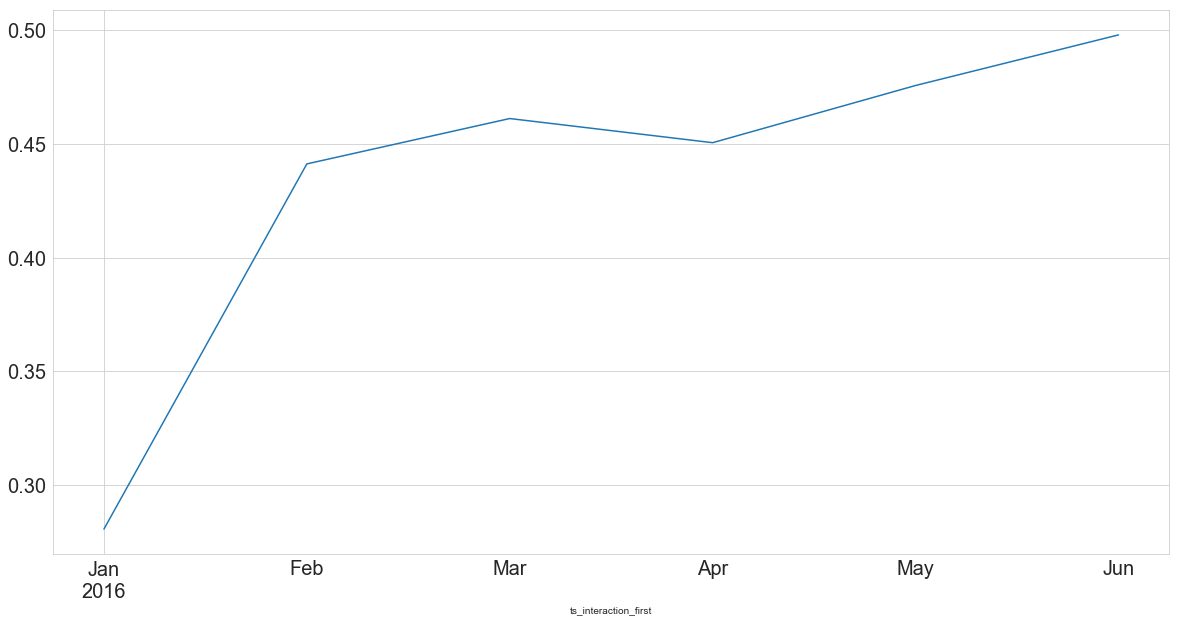

In [33]:
(az/ax).plot(kind='line', figsize=(20,10), grid = None, fontsize=20)


In [34]:
df['time_taken_to_reply']=df['ts_reply_at_first']-df['ts_interaction_first']
df['time_taken_to_reply']=df['time_taken_to_reply'].astype('timedelta64[s]')
df.info()
df.head()
#df['time_between_interaction_and_checkin']=df['ds_checkin_first']-df['ts_interaction_first']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27887 entries, 0 to 27886
Data columns (total 23 columns):
id_guest_anon                           27887 non-null object
id_host_anon                            27887 non-null object
id_listing_anon                         27887 non-null object
ts_interaction_first                    27887 non-null datetime64[ns, UTC]
ts_reply_at_first                       25855 non-null datetime64[ns, UTC]
ts_accepted_at_first                    16415 non-null datetime64[ns, UTC]
ts_booking_at                           11587 non-null datetime64[ns, UTC]
ds_checkin_first                        27887 non-null datetime64[ns]
ds_checkout_first                       27887 non-null datetime64[ns]
m_guests                                27886 non-null float64
m_interactions                          27887 non-null int64
m_first_message_length_in_characters    27887 non-null float64
contact_channel_first                   27887 non-null object
guest_user_stage

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,...,guest_user_stage_first,room_type,listing_neighborhood,total_reviews,guest_country,words_in_guest_profile,host_country,words_in_host_profile,booking,time_taken_to_reply
0,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-04-21 02:55:53+00:00,2016-04-21 03:15:00+00:00,2016-04-21 03:15:00+00:00,2016-04-21 03:15:00+00:00,2016-08-02,2016-08-06,4.0,...,past_booker,Entire home/apt,Copacabana,9.0,CL,0,BR,59,1,1147.0
1,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01+00:00,2016-02-16 23:37:36+00:00,NaT,NaT,2016-08-11,2016-08-22,5.0,...,past_booker,Entire home/apt,Copacabana,0.0,FR,0,BR,0,0,5015.0
2,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38+00:00,2016-01-28 02:12:47+00:00,NaT,NaT,2016-03-14,2016-03-23,1.0,...,new,Private room,Vidigal,49.0,AR,0,BR,82,0,9549.0
3,b0af8848-fe2a-4ef1-991e-26ab3066feb3,01614601-d5a4-4776-ab9b-c10d3b865bf0,855f6779-346c-45fc-a64b-ea133250ca7a,2016-05-05 14:42:52+00:00,2016-05-05 15:17:40+00:00,2016-05-05 15:17:40+00:00,NaT,2016-05-27,2016-05-29,2.0,...,new,Entire home/apt,Copacabana,17.0,BR,0,BR,149,0,2088.0
4,5ddbbcc3-ac1a-4d8a-b6f8-0f675b76d1b2,f2fed6f3-4c5c-453d-9e64-37c62b8bd06d,f2928a59-c5e7-42b2-9c37-240a40f38dc0,2016-06-23 03:09:25+00:00,2016-06-23 03:09:26+00:00,2016-06-23 03:09:33+00:00,2016-06-23 03:09:33+00:00,2016-08-19,2016-08-21,3.0,...,past_booker,Entire home/apt,Ipanema,1.0,BR,1,BR,0,1,1.0


In [35]:
#converting to date

df['ds_interaction_first'] = pd.to_datetime(df['ts_interaction_first']).apply(lambda x: x.date())
df['ds_checkin_first'] = pd.to_datetime(df['ds_checkin_first']).apply(lambda x: x.date())                                  

In [36]:
df.head()

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,...,room_type,listing_neighborhood,total_reviews,guest_country,words_in_guest_profile,host_country,words_in_host_profile,booking,time_taken_to_reply,ds_interaction_first
0,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-04-21 02:55:53+00:00,2016-04-21 03:15:00+00:00,2016-04-21 03:15:00+00:00,2016-04-21 03:15:00+00:00,2016-08-02,2016-08-06,4.0,...,Entire home/apt,Copacabana,9.0,CL,0,BR,59,1,1147.0,2016-04-21
1,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01+00:00,2016-02-16 23:37:36+00:00,NaT,NaT,2016-08-11,2016-08-22,5.0,...,Entire home/apt,Copacabana,0.0,FR,0,BR,0,0,5015.0,2016-02-16
2,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38+00:00,2016-01-28 02:12:47+00:00,NaT,NaT,2016-03-14,2016-03-23,1.0,...,Private room,Vidigal,49.0,AR,0,BR,82,0,9549.0,2016-01-27
3,b0af8848-fe2a-4ef1-991e-26ab3066feb3,01614601-d5a4-4776-ab9b-c10d3b865bf0,855f6779-346c-45fc-a64b-ea133250ca7a,2016-05-05 14:42:52+00:00,2016-05-05 15:17:40+00:00,2016-05-05 15:17:40+00:00,NaT,2016-05-27,2016-05-29,2.0,...,Entire home/apt,Copacabana,17.0,BR,0,BR,149,0,2088.0,2016-05-05
4,5ddbbcc3-ac1a-4d8a-b6f8-0f675b76d1b2,f2fed6f3-4c5c-453d-9e64-37c62b8bd06d,f2928a59-c5e7-42b2-9c37-240a40f38dc0,2016-06-23 03:09:25+00:00,2016-06-23 03:09:26+00:00,2016-06-23 03:09:33+00:00,2016-06-23 03:09:33+00:00,2016-08-19,2016-08-21,3.0,...,Entire home/apt,Ipanema,1.0,BR,1,BR,0,1,1.0,2016-06-23


In [37]:
df['time_between_checkin_and_first_interaction']=df['ds_checkin_first']-df['ds_interaction_first']
df['time_between_checkin_and_first_interaction']=df['time_between_checkin_and_first_interaction'].astype('timedelta64[D]')


In [38]:
df['time_between_checkin_and_first_interaction'] = df['time_between_checkin_and_first_interaction'].apply(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27887 entries, 0 to 27886
Data columns (total 25 columns):
id_guest_anon                                 27887 non-null object
id_host_anon                                  27887 non-null object
id_listing_anon                               27887 non-null object
ts_interaction_first                          27887 non-null datetime64[ns, UTC]
ts_reply_at_first                             25855 non-null datetime64[ns, UTC]
ts_accepted_at_first                          16415 non-null datetime64[ns, UTC]
ts_booking_at                                 11587 non-null datetime64[ns, UTC]
ds_checkin_first                              27887 non-null object
ds_checkout_first                             27887 non-null datetime64[ns]
m_guests                                      27886 non-null float64
m_interactions                                27887 non-null int64
m_first_message_length_in_characters          27887 non-null float64
contact_channe

In [39]:
dfhost = df[df['contact_channel_first']!='instant_book'] 
dfhost.groupby(['booking']).agg({'words_in_host_profile':'median','total_reviews':'median','time_taken_to_reply':'median',
                                                    'time_between_checkin_and_first_interaction':'median','m_first_message_length_in_characters':'median'
                                ,'total_reviews':'mean'})


,words_in_host_profile,total_reviews,time_taken_to_reply,time_between_checkin_and_first_interaction,m_first_message_length_in_characters
booking,,,,,
0,16,8.855092,11693.0,54,166.0
1,28,21.729260,3674.0,27,150.0


In [43]:
# Imputing negative total reviews to the median value
dfhost.loc[dfhost['total_reviews'] < 0, 'total_reviews'] = 3
dfhost['total_reviews'] < 0

0        False
1        False
2        False
3        False
5        False
6        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
20       False
22       False
25       False
27       False
28       False
30       False
31       False
32       False
33       False
34       False
36       False
37       False
38       False
39       False
         ...  
27848    False
27849    False
27850    False
27851    False
27852    False
27853    False
27854    False
27855    False
27856    False
27858    False
27860    False
27861    False
27862    False
27863    False
27864    False
27865    False
27866    False
27867    False
27868    False
27870    False
27872    False
27873    False
27874    False
27876    False
27877    False
27879    False
27880    False
27881    False
27882    False
27884    False
Name: total_reviews, Length: 21194, dtype: bool

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


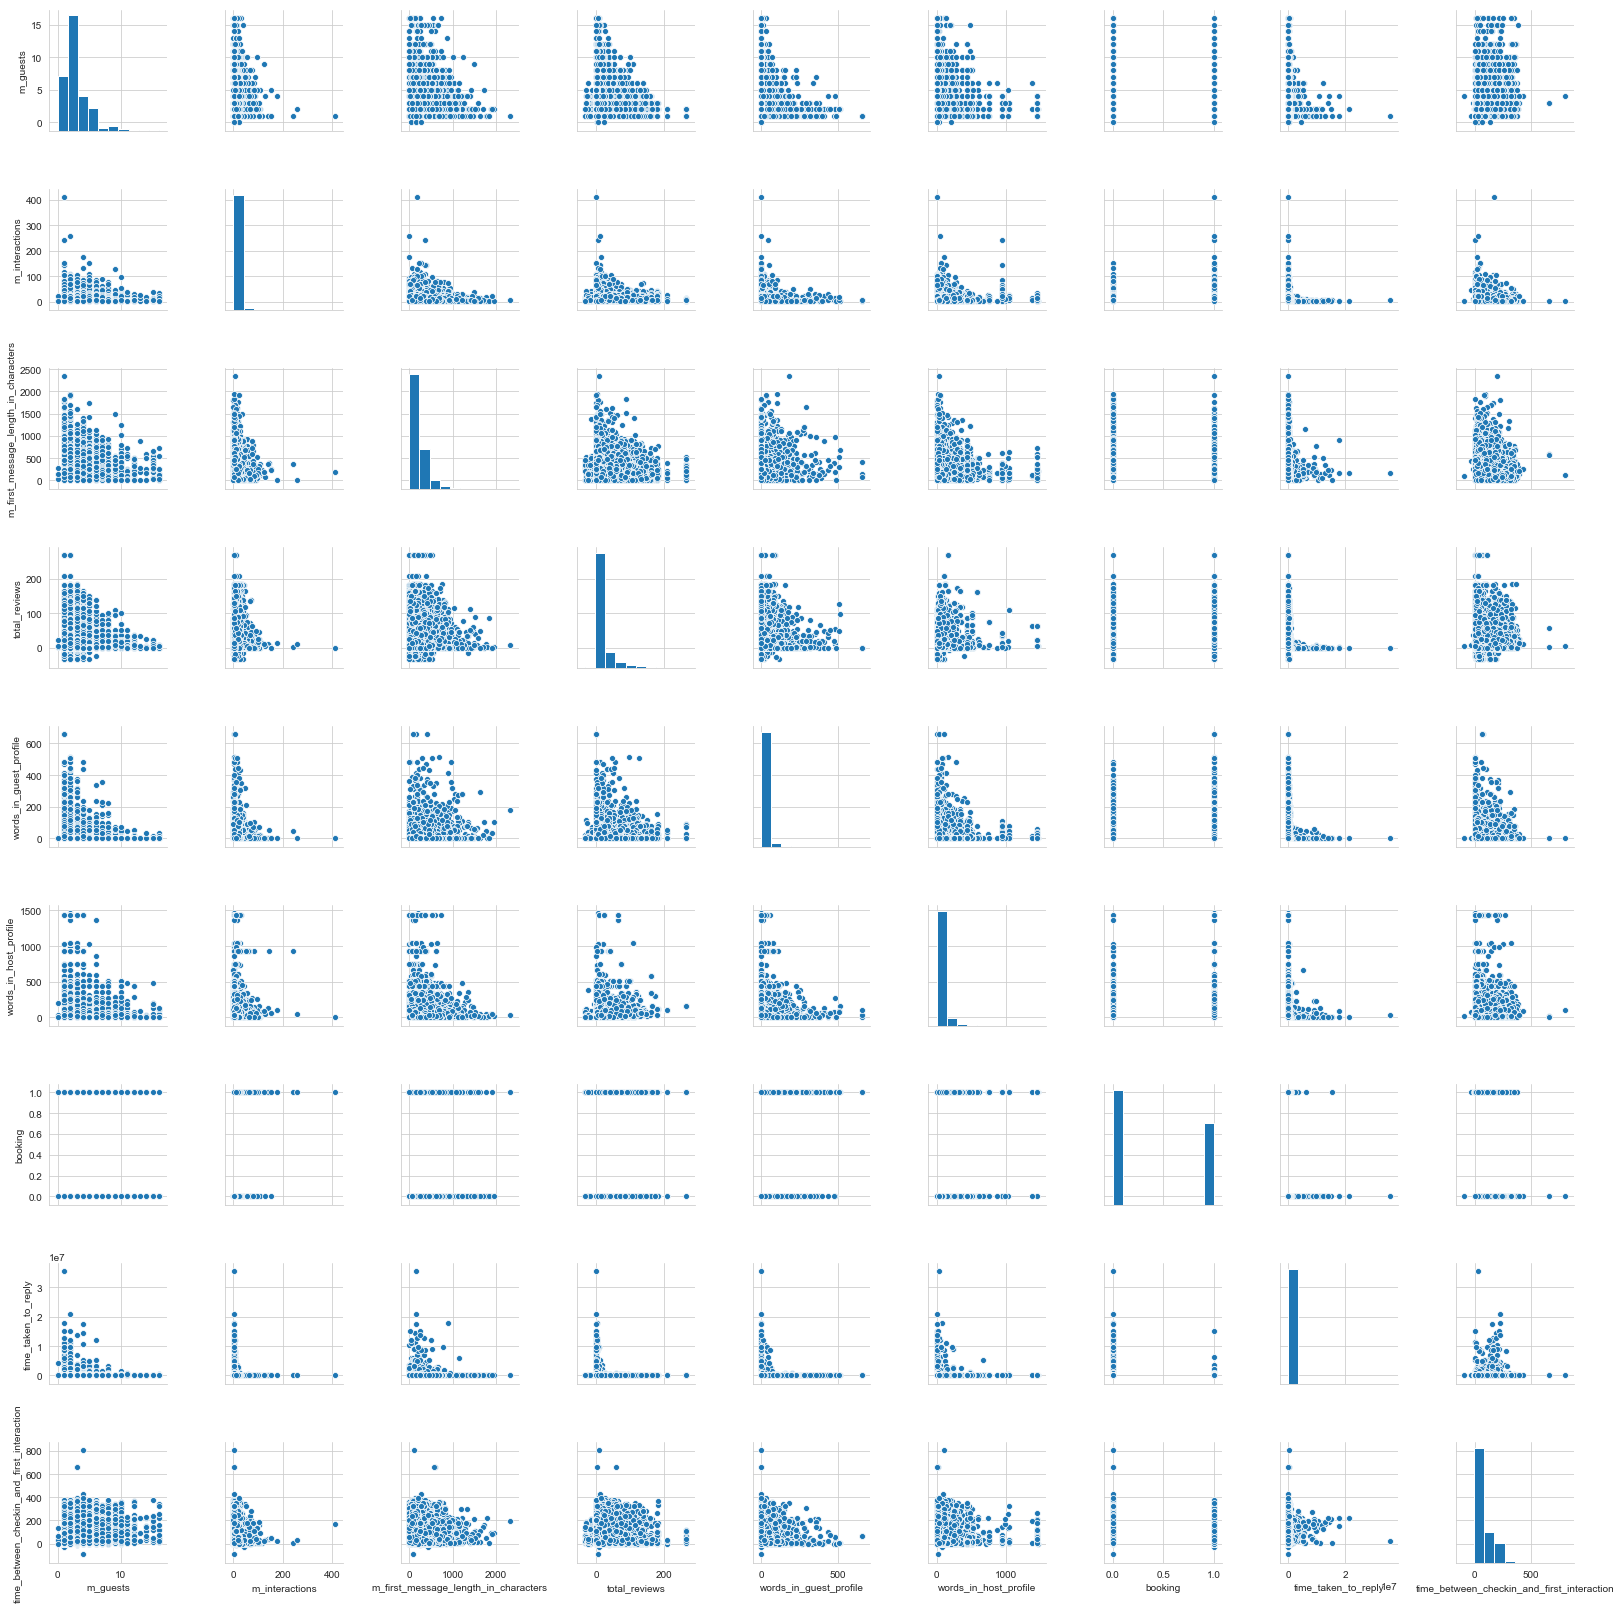

In [45]:
sns.pairplot(df)

In [64]:
dfnew=dfhost[['m_first_message_length_in_characters','total_reviews','time_taken_to_reply',
         'time_between_checkin_and_first_interaction','booking']]

In [67]:
# no. of null value columns
null_columns=dfnew.columns[dfnew.isnull().any()]
dfnew[null_columns].isnull().sum()

Series([], dtype: float64)

In [66]:
#removing the row with m_guests as null
#dfnew[dfnew["m_guests"].isnull()]
#dfnew = dfnew.dropna(axis=0, subset=['m_guests'])
#replacing null values for time_taken_to_reply by 0
dfnew.fillna(value=0,inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [68]:
dfnew.describe()

,m_first_message_length_in_characters,total_reviews,time_taken_to_reply,time_between_checkin_and_first_interaction,booking
count,21194.000000,21194.000000,2.119400e+04,21194.000000,21194.000000
mean,204.857837,11.910494,6.326284e+04,75.248844,0.230914
std,185.553367,22.668312,5.494156e+05,74.777921,0.421428
min,0.000000,0.000000,-7.000000e+01,-94.000000,0.000000
25%,79.250000,0.000000,5.790000e+02,16.000000,0.000000
50%,163.000000,2.000000,5.814500e+03,45.000000,0.000000
75%,281.000000,13.000000,3.311250e+04,125.000000,0.000000
max,1948.000000,268.000000,3.543455e+07,804.000000,1.000000


In [ ]:
dfnew.head()

In [69]:
# Labels are the values we want to predict
# Remove the labels from the features
# axis 1 refers to the columns
#labels = np.array(dfnew['booking'])
# Remove the labels from the features
# axis 1 refers to the columns
#features= dfnew.drop('booking', axis = 1)
# Saving feature names for later use
#feature_list = list(features.columns)
# Convert to numpy array
#features = np.array(features)

X = dfnew.drop('booking',axis=1)
y = dfnew['booking']


In [70]:
#Using Skicit-learn to split data into training and testing sets

from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [71]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (14835, 4)
Training Labels Shape: (14835,)
Testing Features Shape: (6359, 4)
Testing Labels Shape: (6359,)


In [72]:
#from sklearn.ensemble import RandomForestRegressor

#regressor = RandomForestRegressor(n_estimators=40, random_state=0)  
#regressor.fit(train_features, train_labels)  
#y_pred = regressor.predict(test_features)  

from sklearn.ensemble import RandomForestClassifier 
## This line instantiates the model. 
rf = RandomForestClassifier(n_estimators=100) 
## Fit the model on your training data.
rf.fit(X_train,y_train) 
y_pred=rf.predict(X_test)

In [73]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.781412171725114


In [74]:
feature_imp = pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

time_taken_to_reply                           0.316616
m_first_message_length_in_characters          0.254645
time_between_checkin_and_first_interaction    0.224567
total_reviews                                 0.204172
dtype: float64

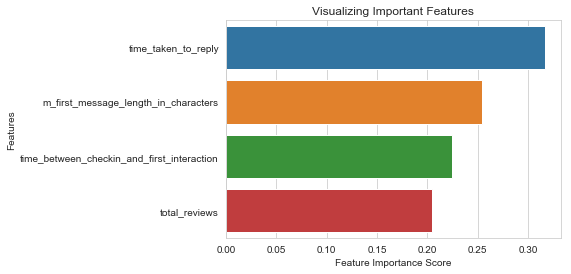

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()